### Please Note:
- Model is overfitting and thus not providing a relevant prediction

In [1]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.
from sklearn.model_selection import LeaveOneOut # Leave One Out Cross Validation --> this is inefficient and expensive

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules
from sklearn.linear_model import LogisticRegression as LR
from sklearn import svm #might take a while 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #probably not worth it 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #probably not worth it
import xgboost as xgb #gradient boosting #probably not worth it
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Warnings
import warnings
warnings.filterwarnings("ignore")

#show me what you got
pd.set_option("display.max_rows", None, "display.max_columns", None)

import terality as te

You are using version 0.12.18 of the Terality client, but version 0.12.27 is available. Consider upgrading your version to get the latest fixes and features.


## Goal: 
### 1: Predict/Classify when a person will die (use injury level = fatality column)

#### i.e., Given that an individual is involved in a traffic accident, what predicts if that individual will die

In [322]:
Use = pd.read_csv("General_Clean_2008")

In [323]:
Use.dropna().head()

,Unnamed: 0,OCUPANTS,MODEL,BODY_TYP_x,REG_STAT,ROLLOVER_x,J_KNIFE,TRAV_SP,HAZ_INV,HAZ_PLAC,HAZ_CNO,HAZ_REL,TOW_VEH_x,V_CONFIG,CARGO_BT,SPEC_USE_x,EMER_USE_x,IMPACT1_x,IMPACT2_x,UNDERIDE,DEFORMED,IMPACTS_x,TOWAWAY,FIRE_EXP_x,VEH_CF1,VEH_CF2,VEH_MAN,AVOID,M_HARM,SEQ1,SEQ2,SEQ3,SEQ4,SEQ5,SEQ6,BUS_USE,GVWR,UNITTYPE,HAZ_ID,MAK_MOD_x,MOD_YEAR_x,SER_TR_x,FLDCD_TR,WHLBS_SH_x,WHLBS_LG_x,MCYCL_DS_x,WGTCD_TR_x,DR_PRES,DR_DRINK,L_STATE,L_TYPE,L_STATUS,CDL_STAT,L_ENDORS,L_COMPL,L_RESTRI,VIOLCHG1,VIOLCHG2,VIOLCHG3,PREV_ACC,PREV_SUS,PREV_DWI,PREV_SPD,PREV_OTH,LAST_MO,FIRST_MO,DR_CF1,DR_CF2,DR_CF3,DR_CF4,DR_WGT,DR_HGT,LAST_YR,FIRST_YR,HIT_RUN_x,AGE,SEX,PER_TYP,SEAT_POS,REST_USE,AIR_BAG,EJECTION,EJ_PATH,EXTRICAT,LOCATION,DRINKING,ALC_DET,ATST_TYP,ALC_RES,DRUGS,DRUG_DET,DRUGTST1,DRUGRES1,DRUGTST2,DRUGRES2,DRUGTST3,DRUGRES3,INJ_SEV,HOSPITAL,DEATH_MO,DEATH_DA,DEATH_HR,RACE,HISPANIC,P_CF1,P_CF2,P_CF3,WORK_INJ,DOA,MAKE_y,DAY_x,HOUR_x,ROAD_FNC_x,SCH_BUS_x,STATE,MONTH,VE_TOTAL,PERSONS,PEDS,NHS,ROUTE,SP_JUR,HARM_EV,MAN_COLL,REL_JUNC,REL_ROAD,TRAF_FLO,NO_LANES,SP_LIMIT,ALIGNMNT,PROFILE,PAVE_TYP,SUR_COND,TRA_CONT,T_CONT_F,LGT_COND,WEATHER1,WEATHER2,C_M_ZONE,HOSP_HR,HOSP_MN,CF1,CF2,CF3,DAY_WEEK,DRUNK_DR,VE_FORMS,WEATHER
333,333,1.0,999.0,99.0,99.0,0.0,0.0,99.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0,1.0,1.0,0.0,31.0,0.0,1.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,99999.0,9999.0,999,9,9999.0,9999.0,9999.0,9.0,3.0,0.0,99.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,0.0,0.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,90.0,0.0,0.0,0.0,999.0,999.0,9999.0,9999.0,2.0,99.0,9.0,1.0,11.0,99.0,99.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,96.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,99.0,13.0,20.0,19.0,0.0,1,3,2,4,1,0,6,0,8,0,1,1,1,2,20,1,1,2,1,0,0,2,1,0,0,0,0,0,0,0,5,0,2,1
371,371,3.0,43.0,4.0,92.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,6.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0,63.0,30.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35043.0,1990.0,999,9,9999.0,9999.0,9999.0,9.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,99.0,99.0,99.0,1.0,4.0,1.0,0.0,0.0,11.0,1.0,44.0,6.0,0.0,0.0,175.0,73.0,2006.0,2006.0,0.0,27.0,1.0,1.0,11.0,99.0,30.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,96.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,35.0,31.0,19.0,15.0,0.0,1,3,1,3,0,0,6,0,30,0,2,4,1,2,30,1,1,2,1,20,3,2,1,0,0,99,99,0,0,0,2,0,1,1
372,372,3.0,43.0,4.0,92.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,6.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0,63.0,30.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35043.0,1990.0,999,9,9999.0,9999.0,9999.0,9.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,99.0,99.0,99.0,1.0,4.0,1.0,0.0,0.0,11.0,1.0,44.0,6.0,0.0,0.0,175.0,73.0,2006.0,2006.0,0.0,22.0,2.0,2.0,13.0,99.0,30.0,2.0,9.0,0.0,0.0,8.0,9.0,0.0,96.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,35.0,31.0,19.0,15.0,0.0,1,3,1,3,0,0,6,0,30,0,2,4,1,2,30,1,1,2,1,20,3,2,1,0,0,99,99,0,0,0,2,0,1,1
373,373,3.0,43.0,4.0,92.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,6.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0,63.0,30.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35043.0,1990.0,999,9,9999.0,9999.0,9999.0,9.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,99.0,99.0,99.0,1.0,4.0,1.0,0.0,0.0,11.0,1.0,44.0,6.0,0.0,0.0,175.0,73.0,2006.0,2006.0,0.0,4.0,2.0,2.0,23.0,2.0,30.0,0.0,0.0,0.0,0.0,8.0,9.0,0.0,96.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,31.0,20.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,35.0,31.0,19.0,15.0,0.0,1,3,1,3,0,0,6,0,30,0,2,4,1,2,30,1,1,2,1,20,3,2,1,0,0,99,99,0,0,0,2,0,1,1
464,464,1.0,731.0,90.0,0.0,0.0,0.0,99.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,6.0,1.0,2.0,0.0,0.0,0.0,1.0,8.0,27.0,65.0,64.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,76731.0,9999.0,999,9,9999.0,9999.0,9999.0,9.0,1.0,1.0,1.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,160.0,66.0,0.0,0.0,0.0,34.0,1.0,1.0,11.0,0.0,30.0,8.0,0.0,0.0,0.0,1.0,9.0,0.0,96.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,4.0,12.0,17.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,76.0

In [301]:
#drop a few more variables
Use.drop(columns=["MAKE_y", "DR_HGT", "DR_WGT", "DR_CF4", "DR_CF3", "DR_CF2", "DR_CF1", "DEATH_DA", "DEATH_MO", "DOA", 'SER_TR_x', "DEATH_HR", "WORK_INJ", "M_HARM", "MODEL", "SEQ1", "TOWAWAY", 'EMER_USE_x', "SEQ2", "SEQ3", "HISPANIC", "RACE", "SEQ4", "SEQ5", "SEQ6"], axis=1, inplace=True)

In [303]:
df_dummies = pd.get_dummies(Use,columns=[
    "BODY_TYP_x",
    "REG_STAT",
    "ROLLOVER_x",
    'J_KNIFE',
    'HAZ_INV',
    'HAZ_PLAC',
    'HAZ_CNO',
    'HAZ_REL',
    'TOW_VEH_x',
    'V_CONFIG',
    'CARGO_BT',
    'SPEC_USE_x',
    'IMPACT1_x',
    'IMPACT2_x',
    'UNDERIDE',
    'DEFORMED',
    'IMPACTS_x',
    'FIRE_EXP_x',
    'VEH_CF1',
    'VEH_CF2',
    'VEH_MAN',
    'AVOID',
    'BUS_USE',
    'GVWR',
    'UNITTYPE',
    'HAZ_ID',
    'MAK_MOD_x',
    'MOD_YEAR_x',
    'FLDCD_TR',
    'DR_PRES',
    'DR_DRINK',
    'L_STATE',
    'L_TYPE',
    'L_STATUS',
    'CDL_STAT',
    'L_ENDORS',
    'L_COMPL',
    'L_RESTRI',
    'VIOLCHG1',
    'VIOLCHG2',
    'VIOLCHG3',
    'PREV_ACC',
    'PREV_SUS',
    'PREV_DWI',
    'PREV_SPD',
    'PREV_OTH',
    'LAST_MO',
    'FIRST_MO',
    'LAST_YR',
    'FIRST_YR',
    'HIT_RUN_x',
    'SEX',
    'PER_TYP',
    'SEAT_POS',
    'REST_USE',
    'AIR_BAG',
    'EJECTION',
    'EJ_PATH',
    'EXTRICAT',
    'LOCATION',
    'DRINKING',
    'ALC_DET',
    'ATST_TYP',
    'ALC_RES',
    'DRUGS',
    'DRUG_DET',
    'DRUGTST1',
    'DRUGRES1',
    'DRUGTST2',
    'DRUGRES2',
    'DRUGTST3',
    'DRUGRES3',
    'INJ_SEV',
    'P_CF1',
    'P_CF2',
    'P_CF3',
    'DAY_x',
    'HOUR_x',
    'ROAD_FNC_x',
    'SCH_BUS_x',
    'STATE',
    'MONTH',
    'PERSONS',
    'PEDS',
    'NHS',
    'ROUTE',
    'HARM_EV',
    'MAN_COLL',
    'REL_JUNC',
    'REL_ROAD',
    'TRAF_FLO',
    'NO_LANES',
    'SP_LIMIT',
    'ALIGNMNT',
    'PROFILE',
    'PAVE_TYP',
    'SUR_COND',
    'TRA_CONT',
    'T_CONT_F',
    'LGT_COND',
    'WEATHER1',
    'WEATHER2',
    'C_M_ZONE',
    'CF1',
    'CF2',
    'CF3',
    'DAY_WEEK',
    'DRUNK_DR',
    "WEATHER"])


In [304]:
#drop other types of injury outcomes 
df_dummies.drop(columns=['Unnamed: 0', 'INJ_SEV_0.0', 'INJ_SEV_1.0', 'INJ_SEV_2.0', 'INJ_SEV_3.0', 'INJ_SEV_5.0', 'INJ_SEV_6.0', 'INJ_SEV_9.0',], axis=1, inplace=True)

df_dummies = df_dummies.dropna()

Y = df_dummies[["INJ_SEV_4.0"]]       
X = df_dummies.drop(columns=["INJ_SEV_4.0"])
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = .75, random_state=123)

In [305]:
Total = df_dummies['INJ_SEV_4.0'].sum()
print (Total) #number of fatalities left after trimming data 

1247


In [306]:
df_dummies.shape

(3403, 2840)

In [307]:
#pre-processing
# Scale data 
scaler = pp.MinMaxScaler()
col_names = list(test_X)
test_X = scaler.fit_transform(test_X)

# Convert back into data frame
test_X = pd.DataFrame(test_X,columns=col_names)

# Scale test data 
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)

In [308]:
use_metrics = ["neg_mean_squared_error"]

In [309]:
# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=10, shuffle=True,random_state=1234)

In [310]:
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

In [311]:
## Please note: I commented out the models which were less predictive so I could run the logit faster

search_space = [
    
    # NaiveBayes
    #{'model': [NB()]},
    
    # Logistic Regression
    {'model' : [LR()]},
    
    # KNN with K tuning param
    #{'model' : [KNN()],
    #'model__n_neighbors':[5,10,25,50, 75, 100, 200]},
        
    # Decision Tree with the Max Depth Param
    #{'model': [DT()],
    #'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators tuning param
    #{'model' : [RF()],
    #'model__max_depth':[2,3,4],
    #'model__n_estimators':[500,1000,1500]},
    
    #Gradient Boosting Classifier
    #{'model' : [GradientBoostingClassifier()],
    #'model__max_depth':[3, 7, 9],
    #'model__n_estimators':[10, 100, 1000],
    #'model__learning_rate':[0.001, 0.01, 0.1],
    #'model__subsample':[.5, .7, 1.0]}
    
    # SVM
    #{'model' : [svm()],
    #'C' : [0,1, 1, 10, 100],
    #'gamma': [1, 0.1, 0.01, 0.001],
    #'kernel': ['rbf', 'poly', 'linear'],
    #'class_weight': ['balanced']}
    
]

In [312]:
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

In [313]:
search.fit(train_X,train_Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4, param_grid=[{'model': [LogisticRegression()]}],
             scoring='roc_auc')

In [314]:
search.best_score_

0.9574269433921005

In [315]:
search.best_params_

{'model': LogisticRegression()}

In [316]:
rf_mod = search.best_estimator_

In [317]:
m.roc_auc_score(train_Y,rf_mod.predict_proba(train_X)[:,1])

0.9995240390050035

## Model Interpretation

In [318]:
pr_y = rf_mod.predict_proba(train_X)[:,rf_mod.classes_ == 1]

In [319]:
surrogate_model = DT_reg(max_depth=3)
surrogate_model.fit(train_X,pr_y)

DecisionTreeRegressor(max_depth=3)

In [320]:
m.r2_score(pr_y,surrogate_model.predict(train_X)).round(2)

0.74

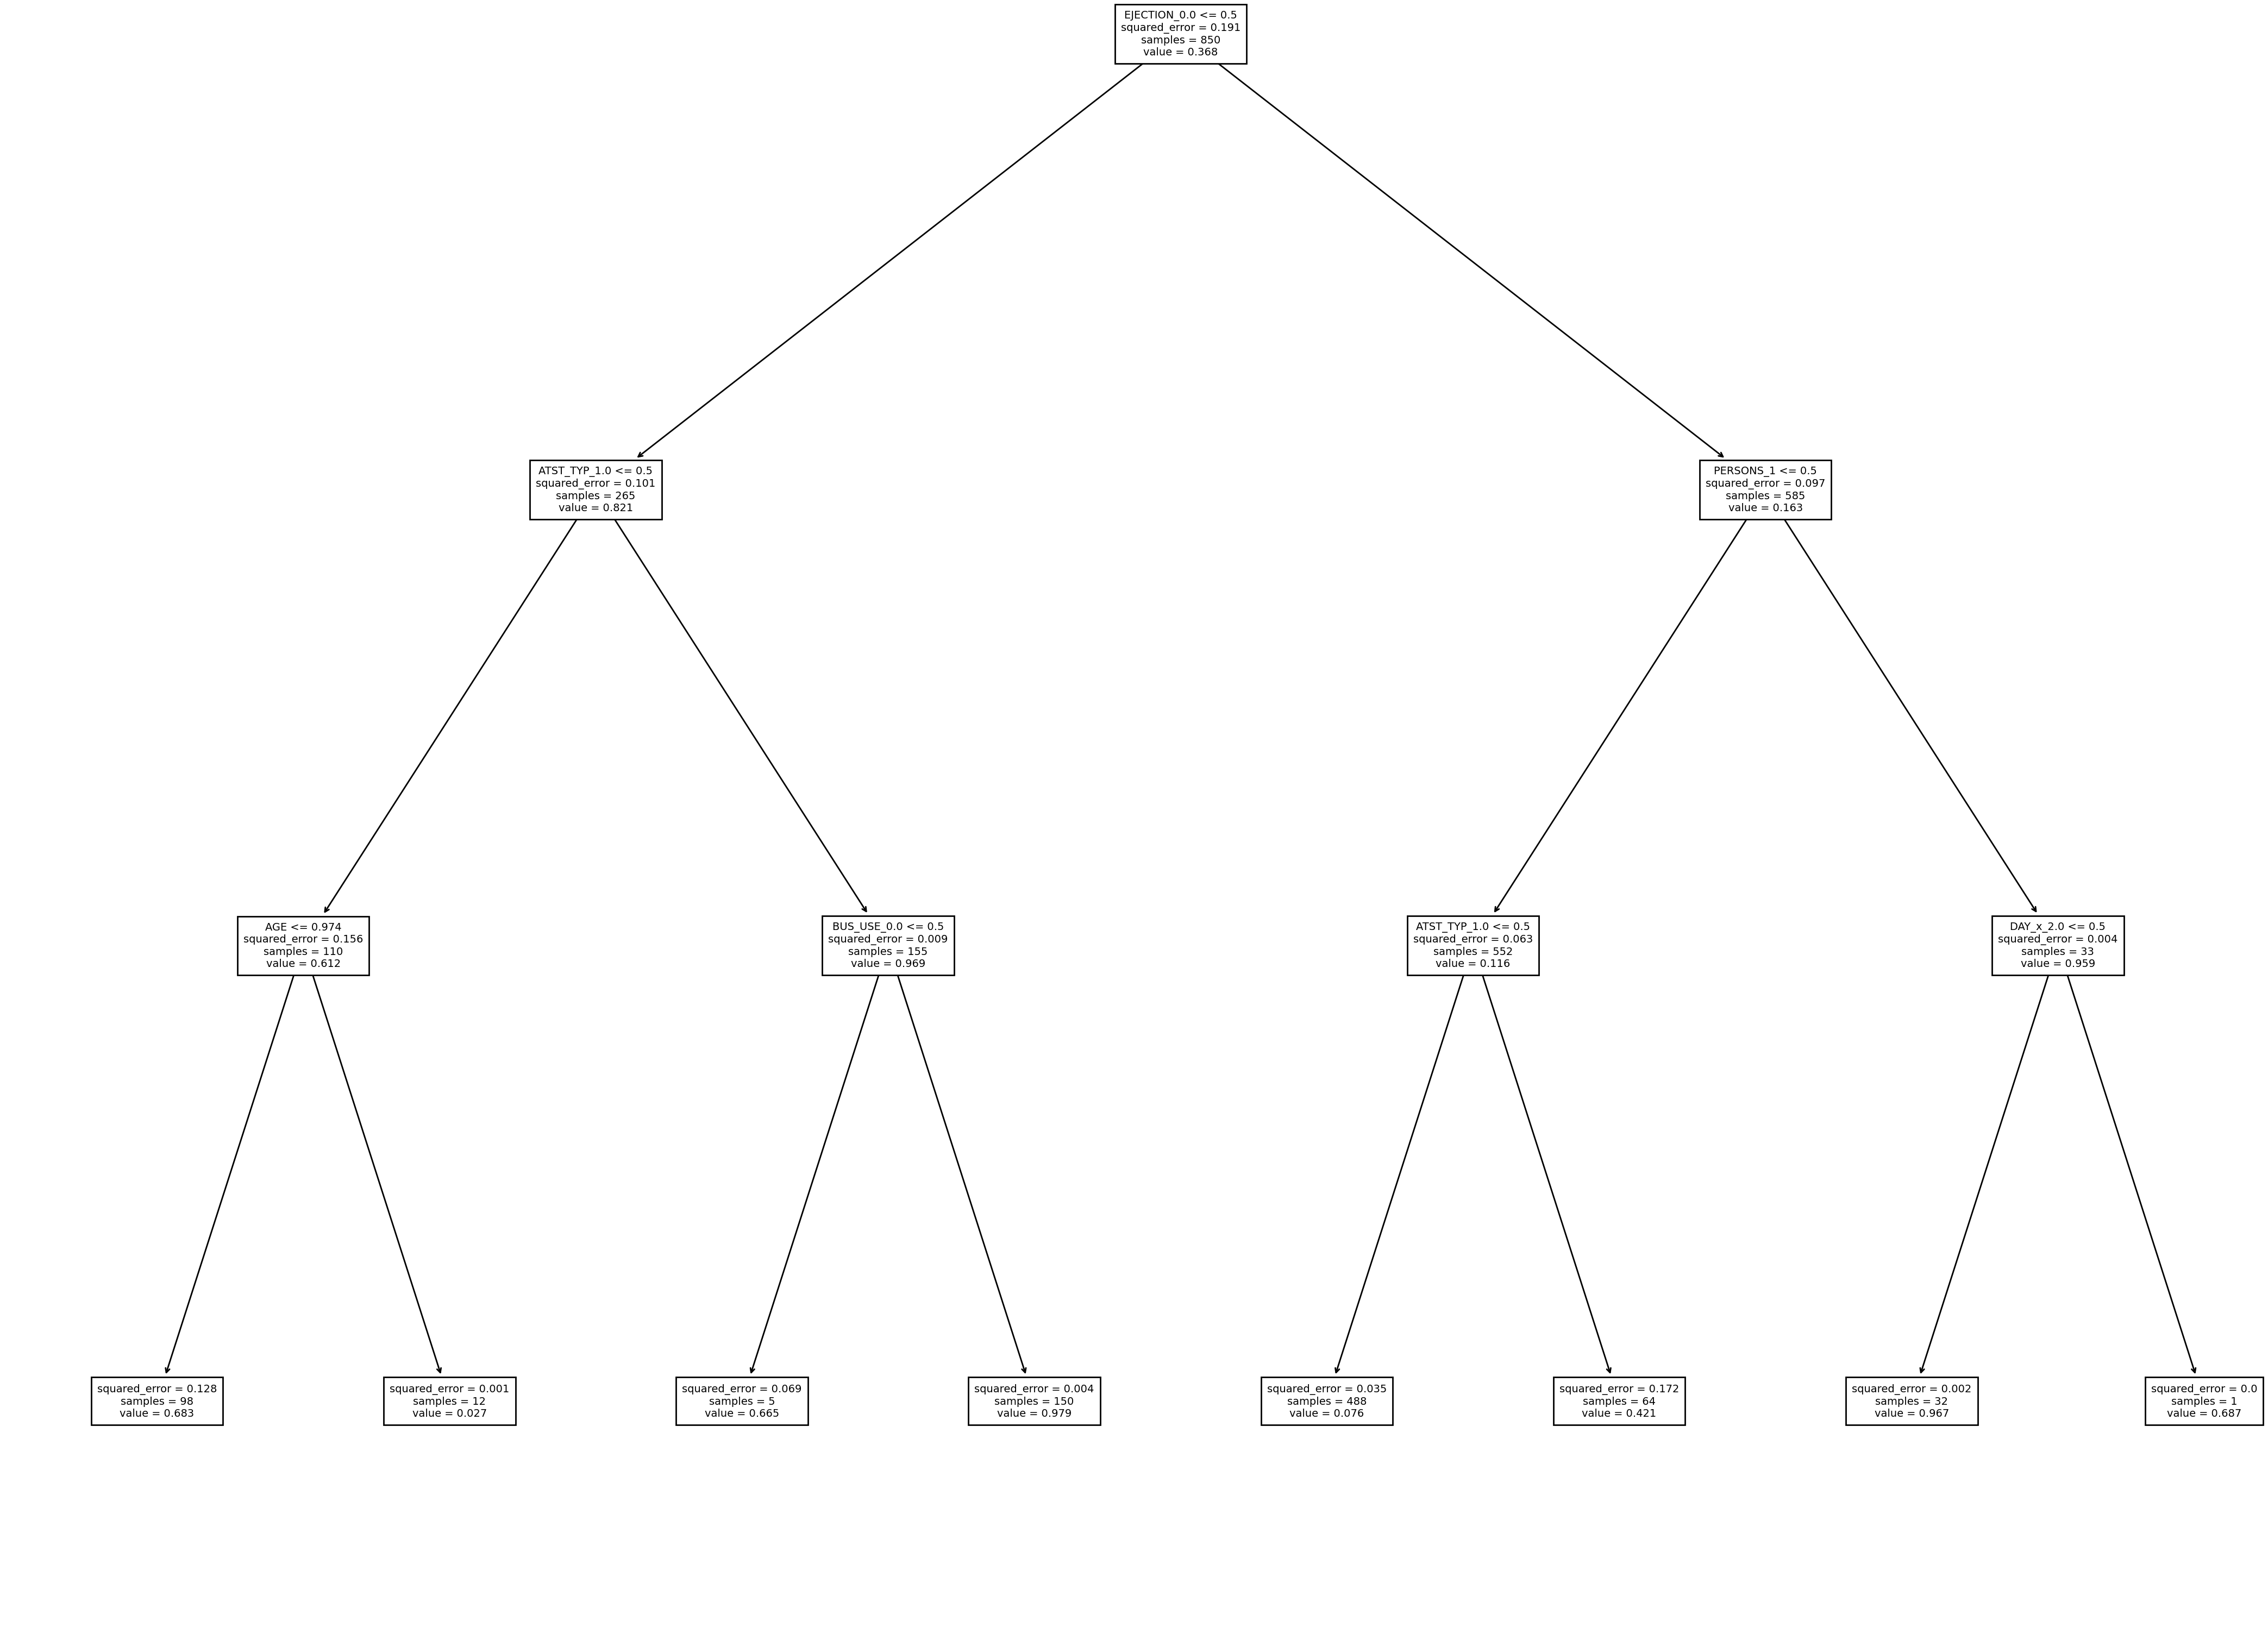

In [324]:
plt.figure(figsize=(10,8),dpi=200)
rules = tree.plot_tree(surrogate_model,feature_names=train_X.columns,fontsize=7)